In [1]:
import networkx  as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from backbone_disparity import disparity_filter


In [2]:
df = pd.read_pickle('../../Files/test_0613_cross.pickle')
# ratio3 = pd.read_pickle('../../Files/test0609_ratio_temp3.pickle')
# ratio2 = pd.read_pickle('../../Files/test0609_ratio_temp2.pickle')

In [3]:
df.head()

,subreddit,crosspost_parent,subreddit_subscribers,crosspost_parent_subs,count,crosspost_parent_num,total
0,6thForm,2meirl4meirl,35791.0,1268402,1,3,111
1,6thForm,6thForm,37984.0,37984,4,8,4
2,6thForm,Advice,37341.0,512881,1,1,11
3,6thForm,AlevelGeog,41873.0,159,1,1,1
4,6thForm,ApplyingToCollege,38328.5,325892,2,2,6


In [76]:
ratio = pd.concat([ratio3, ratio2])
ratio.head()

In [33]:
G = nx.Graph()

In [34]:
t = df['subreddit'].drop_duplicates().to_list()
t.extend(df['crosspost_parent'].drop_duplicates().to_list())
res = []
for i in t:
    if i not in res:
        res.append(i)
G.add_nodes_from(res)

In [35]:
e = df[['subreddit', 'crosspost_parent', 'count']].values.tolist()

In [36]:
for u, v, weight in e:
    G.add_edge(u, v)
    G[u][v]['weight'] = weight

In [37]:
G['Anarcho_Capitalism']['Anarcho_Capitalism']

{'weight': 3}

In [38]:
alpha = 0.05
G = disparity_filter(G)
G2 = nx.Graph([(u, v, d) for u, v, d in G.edges(data=True) if d['alpha'] < alpha])
print('alpha = %s' % alpha)
print('original: nodes = %s, edges = %s' % (G.number_of_nodes(), G.number_of_edges()))
print('backbone: nodes = %s, edges = %s' % (G2.number_of_nodes(), G2.number_of_edges()))



alpha = 0.05
original: nodes = 9354, edges = 28200
backbone: nodes = 839, edges = 1152
[('2meirl4meirl', 'aspiememes', {'weight': 58, 'alpha': 0.0}), ('aspiememes', 'PrequelMemes', {'weight': 11, 'alpha': 0.0059}), ('aspiememes', 'dankmemes', {'weight': 54, 'alpha': 0.0}), ('aspiememes', 'meirl', {'weight': 45, 'alpha': 0.0}), ('aspiememes', 'meme', {'weight': 12, 'alpha': 0.0448}), ('aspiememes', 'memes', {'weight': 308, 'alpha': 0.0}), ('aspiememes', 'teenagers', {'weight': 27, 'alpha': 0.0002}), ('aspiememes', '196', {'weight': 23, 'alpha': 0.0164}), ('aspiememes', '2meirl42meirl4meirl', {'weight': 24, 'alpha': 0.0001}), ('aspiememes', 'AutisticPride', {'weight': 55, 'alpha': 0.0006}), ('aspiememes', 'BikiniBottomTwitter', {'weight': 13, 'alpha': 0.0005}), ('aspiememes', 'BlackPeopleTwitter', {'weight': 6, 'alpha': 0.0293}), ('aspiememes', 'CuratedTumblr', {'weight': 17, 'alpha': 0.0032}), ('aspiememes', 'BrandNewSentence', {'weight': 10, 'alpha': 0.0051}), ('aspiememes', 'INTP', {'

In [11]:
# get number of edges from graph
print(f'Nodes: {len(G.nodes)}, Edges: {len(G.edges)}')

Nodes: 9375, Edges: 30629


In [39]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

Text(0, 0.5, 'Frequency')

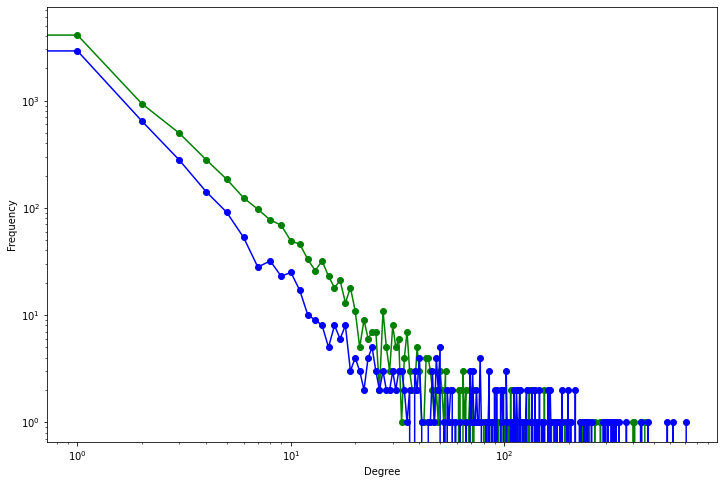

In [13]:
in_degree_freq = degree_histogram_directed(G, in_degree=True)
out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

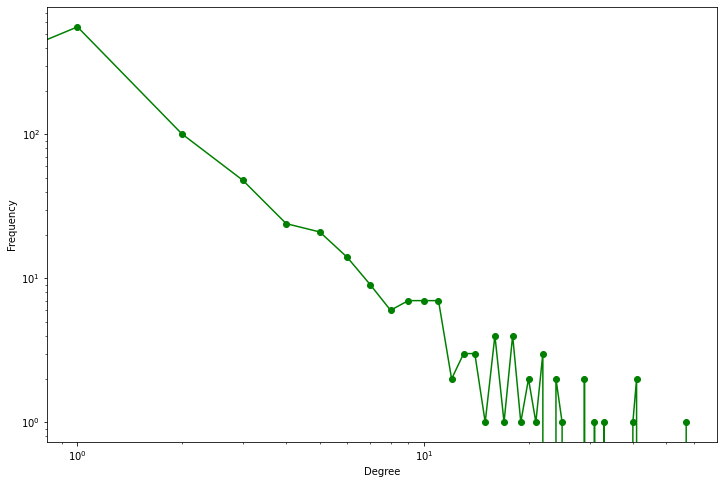

In [41]:
in_degree_freq = degree_histogram_directed(G2, )
# out_degree_freq = degree_histogram_directed(G2, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
# plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

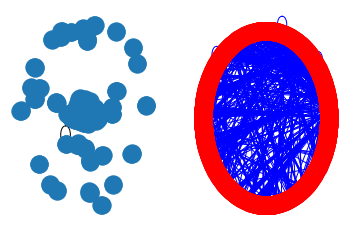

In [42]:
import matplotlib.pyplot as plt

subax1 = plt.subplot(121)
nx.draw(G2)   # default spring_layout
subax2 = plt.subplot(122)
nx.draw(G2, pos=nx.circular_layout(G2), node_color='r', edge_color='b')

In [43]:
df2 = pd.DataFrame.from_dict(nx.degree_centrality(G2), orient='index', columns=['degree_centrality'])
df2 = df2.reset_index().rename(columns={'index': 'subreddit'})
df2['closeness_centrality'] = df2['subreddit'].map(nx.closeness_centrality(G2))
df2['degree'] = df2['subreddit'].map(G2.degree)

df2.head()

,subreddit,degree_centrality,closeness_centrality,degree
0,2meirl4meirl,0.001193,0.182771,1
1,aspiememes,0.039379,0.230555,33
2,PrequelMemes,0.002387,0.182977,2
3,sciencememes,0.004773,0.207315,4
4,dankmemes,0.013126,0.266148,11


In [48]:
df2.sort_values('degree_centrality',ascending=False).head(60)

,subreddit,degree_centrality,closeness_centrality,degree
10,JustUnsubbed,0.068019,0.262599,57
30,RuralNewsNetwork,0.048926,0.214925,41
5,ABoringDystopia,0.048926,0.274813,41
80,PublicFreakout,0.047733,0.270242,40
1,aspiememes,0.039379,0.230555,33
6,Anarcho_Capitalism,0.036993,0.272852,31
82,TheFightThatMatters,0.034606,0.250359,29
11,awfuleverything,0.034606,0.276332,29
58,interestingasfuck,0.029833,0.275046,25
12,theyknew,0.028640,0.247688,24


In [49]:
df2.to_csv('../../Files/subs_backboned.csv')